# **Curvas Elipticas**

**Nombre:** Santiago Tene

**Materia:** Seguridad de la información

# Background Reading

Elliptic Curve Cryptography (ECC) is an asymmetric cryptographic protocol that, like RSA and Diffie-Hellman (DH), relies on a trapdoor function. To recap: trapdoor functions allow a client to keep data secret by performing a mathematical operation which is computationally easy to do, but currently understood to be very expensive to undo.

For RSA, the trapdoor function relies on the hardness of factoring large numbers. For Diffie-Hellman, the trapdoor relies on the hardness of the discrete log problem. For both RSA and DH, the operations that run through the veins of the protocol are familiar to us. Multiplying numbers and taking powers of numbers are things we are taught to do in school. ECC stands out, because the group operation in ECC won't pop up in your life unless you are looking for it.

This discussion here will not be total, and those who are really looking to understand ECC, I recommend these notes Elliptic Curve notes by Ben Lynn, and the textbook "An Introduction to Mathematical Cryptography", Jeffrey Hoffstein, Jill Pipher, Joseph H. Silverman.


Let's start thinking about ECC by looking at what we mean by an elliptic curve. We will be studying Weierstrass equations, which are of the form

Y2 = X3 + a X + b

Elliptic curves have an amazing feature: we can define an operator that we will call "point addition". This operator takes two points on some curve and produces a third point on the curve. Taking the set of points on an elliptic curve, point addition defines an Abelian group operation.

There's a lot of text here. Let's motivate this! We can understand scalar multiplication of a point as the repeated point addition of the same point. Q = 2 P = P + P. It turns out that scalar multiplication is a trapdoor function! ECC relies on the hardness of finding the n such that Q = nP given Q and P.

(4215, 2162)


# STARTER

## Point Negation

In the background section, we covered the basics of how we can view point addition over an elliptic curve as being an abelian group operation. In this geometric picture we allowed the coordinates on the curve to be any real number.

To apply elliptic curves in a cryptographic setting, we study elliptic curves which have coordinates in a finite field Fp.

We will still be considering elliptic curves of the form E: Y2 = X3 + a X + b , which satisfy the following conditions: a,b ∈ Fp and 4a3 + 27 b2 ≠ 0. However, we no longer think of the elliptic curve as a geometric object, but rather a set of points defined by

E(Fp) = {(x,y) : x,y ∈ Fp satisfying: y2 = x3 + a x + b} ∪ O

 Note: Everything we covered in the background still holds. The identity of the group is the point at infinity: O, and the addition law is unchanged. Given two points in E(Fp), the addition law will generate another point in E(Fp).


For all the challenges in the starter set, we will be working with the elliptic curve

E: Y2 = X3 + 497 X + 1768, p: 9739

Using the above curve, and the point P(8045,6936), find the point Q(x,y) such that P + Q = O.

 Remember, we're working in a finite field now, so you'll need to work correctly with negative numbers.

In [1]:
from sage.all import *

# E: Y2 = X3 + 497 X + 1768, p: 9739
a, b, p = 497, 1768, 9739
E = EllipticCurve(GF(p), [a, b])

P = E.point((8045,6936))
Q = -P
x, y = Q.xy()

print("crypto{" + str(x) + "," + str(y) + "}")

crypto{8045,2803}


## Point Addition
While working with elliptic curve cryptography, we will need to add points together. In the background challenges, we did this geometrically by finding a line that passed through two points, finding the third intersection and then reflecting along the y-axis.

It turns out that there is an efficient algorithm for calculating the point addition law for an elliptic curve.

Taken from "An Introduction to Mathematical Cryptography", Jeffrey Hoffstein, Jill Pipher, Joseph H. Silverman, the following algorithm will calculate the addition of two points on an elliptic curve

Algorithm for the addition of two points: P + Q

(a) If P = O, then P + Q = Q.
(b) Otherwise, if Q = O, then P + Q = P.
(c) Otherwise, write P = (x1, y1) and Q = (x2, y2).
(d) If x1 = x2 and y1 = −y2, then P + Q = O.
(e) Otherwise:
  (e1) if P ≠ Q: λ = (y2 - y1) / (x2 - x1)
  (e2) if P = Q: λ = (3x12 + a) / 2y1
(f) x3 = λ2 − x1 − x2,     y3 = λ(x1 −x3) − y1
(g) P + Q = (x3, y3)


In [2]:
from sage.all import *

# E: Y2 = E(X3 + 497 X + 1768, p: 9739
a, b, p = 497, 1768, 9739
E = EllipticCurve(GF(p), [a, b])

P = E((493, 5564))
Q = E((1539, 4742))
R = E((4403,5202))
S = P + P + Q + R

x, y = S.xy()
print("crypto{" + str(x) + "," + str(y) + "}")

crypto{4215,2162}


## Multiplicación escalar
La multiplicación escalar de dos puntos se define mediante la suma repetida: 3P = P + P + P.

En los próximos desafíos, usaremos la multiplicación escalar para crear un secreto compartido a través de un canal inseguro de manera similar a los desafíos Diffie-Hellman.

Tomado de "Introducción a la criptografía matemática", Jeffrey Hoffstein, Jill Pipher, Joseph H. Silverman , el siguiente algoritmo calculará de manera eficiente la multiplicación escalar de un punto en una curva elíptica. Algoritmo de doble y suma para la multiplicación escalar del punto P por n . : P en E(F p ) y un número entero n > 0 1. Establecer Q = P y R = O. 2. Hacer un bucle mientras n > 0.   3. Si n ≡ 1 mod 2, establecer R = R + Q.   4 Conjunto Q = 2 Q y n = ⌊n/2⌋.   5. Si n > 0, continúe con el bucle en el Paso 2. 6. Devuelva el punto R, que es igual a nP.


In [5]:
from sage.all import *

# E: Y2 = E(X3 + 497 X + 1768, p: 9739
a, b, p = 497, 1768, 9739
E = EllipticCurve(GF(p), [a, b])

P = E((2339, 2213))
Q = 7863 * P

x, y = Q.xy()

print("crypto{" + str(x) + "," + str(y) + "}")
# Flag: crypto{9467,2742}

crypto{9467,2742}


## Curves and Logs

El problema del logaritmo discreto de curva elíptica (ECDLP) es el problema de encontrar un número entero ntal que Q = nP.

Como nos encontramos con el problema del logaritmo discreto, la multiplicación escalar de un punto parece ser un problema difícil de deshacer, ya que se ejecuta el algoritmo más eficiente en ese momento. Esto lo convierte en un gran candidato para la función de trampilla. Alice y Bob están hablando y quieren crear un secreto compartido para poder empezar a cifrar sus mensajes con algún protocolo criptográfico simétrico. Alice y Bob no confían en su conexión, por lo que necesitan una forma de crear un secreto que otros no puedan replicar. Alice y Bob se ponen de acuerdo sobre una curva , un primo y un punto generador.E(Fp)p1/2

EpG

En criptografía de curva elíptica, es importante que el orden de Gsea primo. Construir curvas seguras es complicado y se recomienda utilizar una curva preconstruida donde al cliente se le proporciona la curva, la prima y el generador que debe usar.


Alice genera un entero aleatorio secreto y lo calcula. Bob genera un entero aleatorio secreto y lo calcula. Alice envía a Bob y Bob envía a Alice . Debido a la dureza del ECDLP, una espectadora Eve no puede calcular en un tiempo razonable. Luego Alice calcula y Bob calcula . Debido a la asociatividad de la multiplicación escalar, . Alice y Bob pueden usarlo como secreto compartido. Usando la curva, prima y generador:nAQA = nAG

nBQB = nBG

QAQBnA/B

nAQBnBQA

S = nAQB = nBQA

S


E: Y 2 = X 3 + 497 X + 1768, p: 9739, G: (1804,5368)

Calcula el secreto compartido después de que Alice te lo envíe , con tu número entero secreto . Genere una clave calculando el hash SHA1 de la coordenada (tome la representación entera de la coordenada y conviértala en una cadena). La bandera es el resumen hexadecimal que encuentres.QA = (815, 3190)nB = 1829

x

¡¡Esta curva no es criptográficamente segura!! Hemos elegido una pequeña ventaja para estos desafíos iniciales para mantener todo rápido mientras aprendes. Las curvas criptográficamente seguras tienen números primos de tamaño de bits ≈ 256

In [6]:
from sage.all import *
from hashlib import sha1

# E: Y2 = E(X3 + 497 X + 1768, p: 9739
a, b, p = 497, 1768, 9739
E = EllipticCurve(GF(p), [a, b])

Q  = E((815, 3190))
nb = 1829
x  = (nb * Q).xy()[0]

print("crypto{" + sha1(str(x).encode()).hexdigest() + "}")

crypto{80e5212754a824d3a4aed185ace4f9cac0f908bf}


## Efficient Exchange

Alice and Bob are looking at the Elliptic Curve Discrete Logarithm Problem and thinking about the data they send.

They want to try and keep their data transfer as efficient as possible and realise that sending both the x and y coordinate of their public key isn't necessary.

As long as Alice and Bob agree on the curve parameters, there are only ever two possible values of y for a given x.

In fact, given either of the values of y permissible from the value x they receive, the x coordinate of their shared secret will be the same.

 For these challenges, we have used a prime p ≡ 3 mod 4, which will help you find y from y2.

Using the curve, prime and generator:

E: Y2 = X3 + 497 X + 1768, p: 9739, G: (1804,5368)

Calculate the shared secret after Alice sends you q_x = 4726, with your secret integer nB = 6534.

Use the decrypt.py file to decode the flag

{'iv': 'cd9da9f1c60925922377ea952afc212c', 'encrypted_flag': 'febcbe3a3414a730b125931dccf912d2239f3e969c4334d95ed0ec86f6449ad8'}

In [11]:
from sage.all import *


a, b, p = 497, 1768, 9739
E = EllipticCurve(GF(p), [a, b])

A  = E.lift_x(GF(p)(4726))
nb = 6534
x  = (nb * A).xy()[0]

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import hashlib


def is_pkcs7_padded(message):
    padding = message[-message[-1]:]
    return all(padding[i] == len(padding) for i in range(0, len(padding)))


def decrypt_flag(shared_secret: int, iv: str, ciphertext: str):
    sha1 = hashlib.sha1()
    sha1.update(str(shared_secret).encode('ascii'))
    key = sha1.digest()[:16]
    ciphertext = bytes.fromhex(ciphertext)
    iv = bytes.fromhex(iv)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    plaintext = cipher.decrypt(ciphertext)

    if is_pkcs7_padded(plaintext):
        return unpad(plaintext, 16).decode('ascii')
    else:
        return plaintext.decode('ascii')


shared_secret = x
iv = 'cd9da9f1c60925922377ea952afc212c'
ciphertext = 'febcbe3a3414a730b125931dccf912d2239f3e969c4334d95ed0ec86f6449ad8'

print(decrypt_flag(shared_secret, iv, ciphertext))


crypto{3ff1c1ent_k3y_3xch4ng3}


## Smooth Criminal

Pasé la mañana leyendo sobre ECC y ahora estoy listo para comenzar a cifrar mis mensajes. Le envié una bandera a Bob hoy, pero nunca la leerás.


In [6]:
!pip install pycryptodome

In [1]:
from sage.all import *
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
import hashlib

# Define the curve
p = 310717010502520989590157367261876774703
a = 2
b = 3

E=EllipticCurve(GF(p),[a,b])

# Generator
g_x = 179210853392303317793440285562762725654
g_y = 105268671499942631758568591033409611165
G = E.point((g_x, g_y))

# Bob's public key
b_x = 272640099140026426377756188075937988094
b_y = 51062462309521034358726608268084433317
QB = E.point((b_x, b_y))

#Alice's public key
a_x=280810182131414898730378982766101210916
a_y=291506490768054478159835604632710368904
QA=E.point((a_x,a_y))

#order of generator
n=G.order()

#factoring order! --> proves E is a smooth curve mod p
fac=list(factor(n))

moduli=[]
remainder=[]

#solving dlp using pohlig-hellman algorithm
for i,j in fac:
	mod=i**j
	_g_=G*ZZ(n/mod)
	_q_=QA*ZZ(n/mod)

	dl=discrete_log(_q_,_g_,operation="+")
	moduli.append(mod)
	remainder.append(dl)
	#print(dl)

#Alice's secret integer
nA=crt(remainder,moduli)

#shared secret
S=QB*nA

#key for AES
sha1 = hashlib.sha1()
sha1.update(str(S[0]).encode('ascii'))
key = sha1.digest()[:16]

iv=bytes.fromhex('07e2628b590095a5e332d397b8a59aa7')
enc=bytes.fromhex('8220b7c47b36777a737f5ef9caa2814cf20c1c1ef496ec21a9b4833da24a008d0870d3ac3a6ad80065c138a2ed6136af')

#AES object
cipher=AES.new(key,AES.MODE_CBC,iv)
flag=unpad(cipher.decrypt(enc),16).decode()

#output
print(flag)

crypto{n07_4ll_curv3s_4r3_s4f3_curv3s}


## Exceptional Curves

Aprendiendo de mis errores... Esta vez me he asegurado de que mi curva sea de orden primo. Esta bandera estará a salvo para siempre.

In [3]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from random import randint
import hashlib

FLAG = b'crypto{??????????????????????}'

def HenselLift(P,p,prec):
    E = P.curve()
    Eq = E.change_ring(QQ)
    Ep = Eq.change_ring(Qp(p,prec))
    x_P,y_P = P.xy()
    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)
    x, y, a1, a2, a3, a4, a6 = var('x,y,a1,a2,a3,a4,a6')
    f(a1,a2,a3,a4,a6,x,y) = y^2 + a1*x*y + a3*y - x^3 - a2*x^2 - a4*x - a6
    g(y) = f(ZZ(Eq.a1()),ZZ(Eq.a2()),ZZ(Eq.a3()),ZZ(Eq.a4()),ZZ(Eq.a6()),ZZ(x_P),y)
    gDiff = g.diff()
    for i in range(1,prec):
        uInv = ZZ(gDiff(y=y_lift))
        u = uInv.inverse_mod(p^i)
        y_lift = y_lift - u*g(y_lift)
        y_lift = ZZ(Mod(y_lift,p^(i+1)))
    y_lift = y_lift+O(p^prec)
    return Ep([x_lift,y_lift])

def SmartAttack(P,Q,p,prec):
    E = P.curve()
    Eqq = E.change_ring(QQ)
    Eqp = Eqq.change_ring(Qp(p,prec))

    P_Qp = HenselLift(P,p,prec)
    Q_Qp = HenselLift(Q,p,prec)

    p_times_P = p*P_Qp
    p_times_Q=p*Q_Qp

    x_P,y_P = p_times_P.xy()
    x_Q,y_Q = p_times_Q.xy()

    phi_P = -(x_P/y_P)
    phi_Q = -(x_Q/y_Q)
    k = phi_Q/phi_P
    k = Mod(k,p)
    return k

def shared_secret(public_key, private_key):
    S = public_key * private_key
    return S.xy()[0]


# Curve params
p = 0xa15c4fb663a578d8b2496d3151a946119ee42695e18e13e90600192b1d0abdbb6f787f90c8d102ff88e284dd4526f5f6b6c980bf88f1d0490714b67e8a2a2b77
a = 0x5e009506fcc7eff573bc960d88638fe25e76a9b6c7caeea072a27dcd1fa46abb15b7b6210cf90caba982893ee2779669bac06e267013486b22ff3e24abae2d42
b = 0x2ce7d1ca4493b0977f088f6d30d9241f8048fdea112cc385b793bce953998caae680864a7d3aa437ea3ffd1441ca3fb352b0b710bb3f053e980e503be9a7fece

# Define curve
E = EllipticCurve(GF(p), [a, b])

# Protect against Pohlig-Hellman Algorithm
assert is_prime(E.order())

# Create generator
G = E([3034712809375537908102988750113382444008758539448972750581525810900634243392172703684905257490982543775233630011707375189041302436945106395617312498769005, 4986645098582616415690074082237817624424333339074969364527548107042876175480894132576399611027847402879885574130125050842710052291870268101817275410204850])
H = E([4748198372895404866752111766626421927481971519483471383813044005699388317650395315193922226704604937454742608233124831870493636003725200307683939875286865, 2421873309002279841021791369884483308051497215798017509805302041102468310636822060707350789776065212606890489706597369526562336256272258544226688832663757])

k = SmartAttack(G,H,p,8)

b_x = 0x7f0489e4efe6905f039476db54f9b6eac654c780342169155344abc5ac90167adc6b8dabacec643cbe420abffe9760cbc3e8a2b508d24779461c19b20e242a38
b_y = 0xdd04134e747354e5b9618d8cb3f60e03a74a709d4956641b234daa8a65d43df34e18d00a59c070801178d198e8905ef670118c15b0906d3a00a662d3a2736bf
B = E(b_x, b_y)
secret = shared_secret(B, int(k))

In [4]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import hashlib


def is_pkcs7_padded(message):
    padding = message[-message[-1]:]
    return all(padding[i] == len(padding) for i in range(0, len(padding)))


def decrypt_flag(shared_secret: int, iv: str, ciphertext: str):
    # Derive AES key from shared secret
    sha1 = hashlib.sha1()
    sha1.update(str(shared_secret).encode('ascii'))
    key = sha1.digest()[:16]
    # Decrypt flag
    ciphertext = bytes.fromhex(ciphertext)
    iv = bytes.fromhex(iv)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    plaintext = cipher.decrypt(ciphertext)

    if is_pkcs7_padded(plaintext):
        return unpad(plaintext, 16).decode('ascii')
    else:
        return plaintext.decode('ascii')


shared_secret = secret
iv = "719700b2470525781cc844db1febd994"
ciphertext = "335470f413c225b705db2e930b9d460d3947b3836059fb890b044e46cbb343f0"

print(decrypt_flag(shared_secret, iv, ciphertext))

crypto{H3ns3l_lift3d_my_fl4g!}


## Micro Transmissions

He estado ajustando la longitud de mis bits para garantizar que mis paquetes de datos y tiempos de cálculo sean súper eficientes.

In [8]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from hashlib import sha1

p = 99061670249353652702595159229088680425828208953931838069069584252923270946291
a = 1
b = 4
E = EllipticCurve(GF(p), [a,b])
G = E(43190960452218023575787899214023014938926631792651638044680168600989609069200, 20971936269255296908588589778128791635639992476076894152303569022736123671173)

# worked in sage 9:
#A = E.lift_x(87360200456784002948566700858113190957688355783112995047798140117594305287669)
#B = E.lift_x(6082896373499126624029343293750138460137531774473450341235217699497602895121)

# fix for sage 10:
A = E.lift_x(87360200456784002948566700858113190957688355783112995047798140117594305287669, all=True)[1]
B = E.lift_x(6082896373499126624029343293750138460137531774473450341235217699497602895121, all=True)[1]

#print(E.order().factor())
#7 * 11 * 17 * 191 * 317 * 331 * 5221385621 * 5397618469 * 210071842937040101 * 637807437018177170959577732683

#if priv key is small enough we don't need all of them
primes = [7, 11, 17, 191, 317, 331, 5221385621, 5397618469] 
dlogs = []
for fac in primes:
    t = int(G.order()) // int(fac)
    dlog = (t*G).discrete_log(t*A)
    dlogs += [dlog]
    print("factor:", str(fac), "done")
d = crt(dlogs, primes)

secret = (d*B).xy()[0]

iv = bytes.fromhex("ceb34a8c174d77136455971f08641cc5")
ciphertext = bytes.fromhex("b503bf04df71cfbd3f464aec2083e9b79c825803a4d4a43697889ad29eb75453")
key = sha1(str(secret).encode('ascii')).digest()[:16]
cipher = AES.new(key, AES.MODE_CBC, iv)
print(unpad(cipher.decrypt(ciphertext), 16).decode())

factor: 7 done
factor: 11 done
factor: 17 done
factor: 191 done
factor: 317 done
factor: 331 done
factor: 5221385621 done
factor: 5397618469 done
crypto{d0nt_l3t_n_b3_t00_sm4ll}


## Elliptic Nodes

He incluido una capa adicional de seguridad al seleccionar mis propios parámetros de curva a,by mantenerlos en secreto.

In [9]:
from Crypto.Util.number import inverse,bytes_to_long, long_to_bytes

def cusp_solver(G,H,p):
    R = Integers(p)
    u = R(G[1])//R(G[0]) 
    v = R(H[1])//R(H[0]) 
    return discrete_log(v, u)
def node_solver(G,H,p,a):
    R = Integers(p)
    u = R(G[1]-a*G[0])//R(G[1]+a*G[0])
    v = R(H[1]-a*H[0])//R(H[1]+a*H[0])
    return discrete_log(v, u)

p = 4368590184733545720227961182704359358435747188309319510520316493183539079703
g = [8742397231329873984594235438374590234800923467289367269837473862487362482, 225987949353410341392975247044711665782695329311463646299187580326445253608]
A = [2582928974243465355371953056699793745022552378548418288211138499777818633265, 2421683573446497972507172385881793260176370025964652384676141384239699096612]

#y^2 = x^3 + ax + b
a = ((g[1]**2) - (A[1]**2) - (g[0]**3) + (A[0]**3))//Integers(p)(g[0] - A[0])
b = (g[1]**2) - (g[0]**3) - (a*g[0])

P.<x,y> = PolynomialRing(GF(p))
f = (x^3 + a*x + b)
n_a = 0
if len(f.factor()) == 1:
    n_a = cusp_solver(g,A,p)
if len(f.factor()) == 2:
    singular_pt = f.factor()[0][0].coefficient({x:0}) + f.factor()[1][0].coefficient({x:0})
    if f.factor()[0][1] == 2:
        singular_pt -= 2*f.factor()[0][0].coefficient({x:0})
        g[0] += f.factor()[0][0].coefficient({x:0})
        A[0] += f.factor()[0][0].coefficient({x:0})
    else:
        singular_pt -= 2*f.factor()[1][0].coefficient({x:0})
        g[0] += f.factor()[1][0].coefficient({x:0})
        A[0] += f.factor()[1][0].coefficient({x:0})
    singular_pt = GF(p)(singular_pt).square_root()
    n_a = node_solver(g,A,p,singular_pt)

print(n_a, long_to_bytes(n_a))

175707932493016342199601625200584496546434097133638117913010244817446203005 b'crypto{s1ngul4r_s1mplif1c4t1on}'


## Moving Problems

He aprendido que cuando la vida te da limones, si miras las cosas bien, saben a pares.

In [12]:
#Moving Problems
def mov_attack(a,b,p,gx,gy,ax):
    F = GF(p)
    E = EllipticCurve(F,[a,b])
    order = E.order()

    k = 1 
    while k<100:
        if ((p**k)-1)%order == 0:
            break
        k += 1
    print(k)
    
    Fy = GF(p^k,'y')
    Ee = EllipticCurve(Fy,[a,b])

    P = E((gx,gy))
    xP = E.lift_x(ax)

    Pe = Ee(P)
    xPe = Ee(xP)

    R = Ee.random_point()
    m = R.order()
    d = gcd(m, P.order())
    print(d)
    Q = (m//d)*R

    assert P.order()/Q.order() in ZZ
    assert P.order() == Q.order()

    n = P.order()
    print('computing pairings')
    alpha = Pe.weil_pairing(Q,n)
    beta = xPe.weil_pairing(Q,n)

    print('computing log')
    dd = beta.log(alpha)
    return dd


gx = 479691812266187139164535778017
gy = 568535594075310466177352868412

a = -35
b = 98
p = 1331169830894825846283645180581

E = EllipticCurve(GF(p), [a, b])
A = E.lift_x(1110072782478160369250829345256)
B = E.lift_x(1290982289093010194550717223760)

n_a = mov_attack(a,b,p,gx,gy,1110072782478160369250829345256)
secret = (B*int(n_a)).xy()[0]

2
103686954799254136375814
computing pairings
computing log


In [14]:
from sage.all import EllipticCurve, GF, factor, Integer, CRT

# Define Curve params
p = 1331169830894825846283645180581
a = -35
b = 98
E = EllipticCurve(GF(p), [a,b])
G = E.gens()[0]
print(factor(G.order()))
# 2 * 7 * 271 * 23687 * 1153763334005213

P1 = E(1110072782478160369250829345256, 800079550745409318906383650948)
P2 = E(1290982289093010194550717223760, 762857612860564354370535420319)

print(factor(P1.order()))
# 2 * 7 * 271 * 23687 * 1153763334005213

# We can forget about P2 for now
print(factor(P2.order())) 
# 7 * 271 * 23687 * 1153763334005213 => n_b is even

small_facotrs, big_factor = 2 * 7 * 271 * 23687, 1153763334005213
print(f'small_facotrs: {small_facotrs}')
P1_small = big_factor * P1
G_small = big_factor * G
n_a_small = G_small.discrete_log(P1_small)
print(f'{n_a_small} * {big_factor} * G == {big_factor} * P1')
# 32135505 * 1153763334005213 * G == 1153763334005213 * P1
assert n_a_small * G_small == P1_small

P1_big = small_facotrs * P1
G_big = small_facotrs * G

# Whale breeding :)
l = Integer(big_factor)
assert p*p % l == 1 # embeding degree is 2!
E_ext = E.base_extend(GF(p*p))
P1_big_ext = E_ext(P1_big)
G_big_ext = E_ext(G_big)
T = E_ext.random_point() # hopefully we are not unlucky
T_low_order = T * int(T.order()//l) 
assert P1_big_ext.order() == G_big_ext.order() == G_big_ext.order() == l

alpha = G_big_ext.weil_pairing(T_low_order, l)
beta = P1_big_ext.weil_pairing(T_low_order, l)
n_a_big = beta.log(alpha)

print(f'{n_a_big} * {small_facotrs} * G == {small_facotrs} * P1')
# 774386641791944 * 89868478 * G == 89868478 * P1
assert int(n_a_big) * G_big == P1_big

n_a = CRT(n_a_small, n_a_big, small_facotrs, big_factor)
assert n_a * G == P1

shared_secret = (n_a * P2)[0]

from decrypt import decrypt_flag
data = {'iv': 'eac58c26203c04f68d63dc2c58d79aca', 'encrypted_flag': 'bb9ecbd3662d0671fd222ccb07e27b5500f304e3621a6f8e9c815bc8e4e6ee6ebc718ce9ca115cb4e41acb90dbcabb0d'}
print(decrypt_flag(shared_secret, data['iv'], data['encrypted_flag']))

2 * 7 * 271 * 23687 * 1153763334005213
2 * 7 * 271 * 23687 * 1153763334005213
7 * 271 * 23687 * 1153763334005213
small_facotrs: 89868478
32135505 * 1153763334005213 * G == 1153763334005213 * P1
774386641791944 * 89868478 * G == 89868478 * P1


ModuleNotFoundError: No module named 'decrypt'

## Real Curve Crypto

Al desarrollar un sistema criptográfico seguro, la regla más importante es mantenerlo real.

In [5]:
pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 564.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json

from decimal import Decimal
from mpmath import mp
from tqdm import trange
from Crypto.Cipher import AES
from Crypto.Util.number import *
from Crypto.Util.Padding import unpad
from sage.all import *

import random


mp.dps = 1000
pari("\p 1000")
RR = RealField(3000)

class Custom_Point:
    def __init__(self, a, b):
        self.x = a
        self.y = b
    
# for y^2 = x^3 + g1*x + g2
class Custom_Elliptic_Curve:
    def __init__(self, a, b):
        self.g1 = a
        self.g2 = b
        self.e = [0, 1 ,2]
        if (4*a*a*a) + (27*b*b) < 0:
            self.e = []
            x = var('x') 
            eq = (x**3) + (a*x) + b  
            roots = eq.roots()
            for i in range(3):
                self.e.append(roots[i][0])
            self.e.sort()
        self.torus_img_period = mp.pi / self.M(mp.sqrt(self.e[2] - self.e[0]), mp.sqrt(self.e[1] - self.e[0]))
        self.torus_real_period = mp.pi / self.M(mp.sqrt(self.e[2] - self.e[0]), mp.sqrt(self.e[2] - self.e[1]))

    def lift_x(self, x):
        return mp.sqrt(x**3 + (self.g1*x) + self.g2)
    
    def get_random_point(self):
        gx = mp.mpf(1 + random.random())
        gy = self.lift_x(gx)
        return Custom_Point(gx, gy)
    
    def addition(self, C1, C2):
        slope = 0
        if C1.x == C2.x and C1.y == C2.y:
            slope = (3*C1.x*C1.x + self.g1) / (2*C1.y) 
        elif C1.x == C2.x:
            return None
        else:
            slope = (C1.y - C2.y) / (C1.x - C2.x) 
        x_r = (slope**2) - C1.x - C2.x
        y_r = (slope*(C1.x - x_r)) - C1.y
        return Custom_Point(x_r, y_r)

    def scalar_multiply(self, P, m):
        if m == 1:
            return P
        half_mult = self.scalar_multiply(P, m // 2)
        ans = self.addition(half_mult, half_mult)
        if m % 2 == 1:
            ans = self.addition(ans, P)
        return ans

    def M(self, a, b):
        for _ in range(100):
            a, b = (a + b) / 2, mp.sqrt(a * b)
        return a    
    
    def weierstrass_p(self, z):
        pari("\p 1000")
        pari(f"E=ellinit([{self.g1}, {self.g2}])")
        return pari(f"ellwp(E, {z})")


    def inverse_weierstrass_p(self, P, y=None):
        lb = self.torus_real_period / 2 + 10 ** -5
        hb = self.torus_real_period - 10 ** -5
        tq = trange(500)
        for _ in tq:
            tq.set_description(f'{hb - lb = }')
            mid = (lb + hb) / 2
            if self.weierstrass_p(mid) > P.x:
                hb = mid
            else:
                lb = mid
        if y and y < 0:
            return self.torus_real_period - lb
        return lb
    
def solve_dlp_ecc(curve, G, P):
    g_z = curve.inverse_weierstrass_p(G)
    p_z = curve.inverse_weierstrass_p(P)

    N = 10 ** 200
    ks = 2 ** 128
    eps = 10 ** -112
    mat = Matrix(QQ, 3, 4)
    mat[0, 0] = 1
    mat[0, 3] = floor(N * g_z / curve.torus_real_period)
    mat[1, 1] = 1
    mat[1, 3] = floor(N * p_z / curve.torus_real_period)
    mat[2, 2] = 1
    mat[2, 3] = N
    x = N * eps / ks
    y = N * eps
    z = N * eps / ks
    W = Matrix(QQ, 4, 4)
    W[0, 0] = x
    W[1, 1] = y
    W[2, 2] = z
    W[3, 3] = 1
    L = (mat * W).LLL() / W
    return int(abs(L[0, 0]))


curve = Custom_Elliptic_Curve(-1, 0)

with open('output.txt', 'r') as f:
    data = json.load(f)
    G = Custom_Point(Decimal(data['gx']), Decimal(data['gy']))
    P = Custom_Point(Decimal(data['px']), Decimal(data['py']))
    iv = bytes.fromhex(data['iv'])
    ciphertext = bytes.fromhex(data['ciphertext'])

    private_key = long_to_bytes(solve_dlp_ecc(curve, G, P))
    cipher = AES.new(private_key, AES.MODE_CBC, iv)
    plaintext = cipher.decrypt(ciphertext)
    print("Flag: ", unpad(plaintext, 16))

hb - lb = mpf('0.000000000000000000000000000000000000000000000000000000000000000
hb - lb = mpf('0.000000000000000000000000000000000000000000000000000000000000000


Flag:  b'crypto{real_fields_arent_finite}'


# SIGNATURES
## Digestive

¿Debería evitarse ECDSA para una mejor salud digestiva?

Juega en https://web.cryptohack.org/digestive


In [3]:
import requests
import json 

url_sign = "https://web.cryptohack.org/digestive/sign/"
url_verify = "https://web.cryptohack.org/digestive/verify/"

# Any username value works
username = "admin"
r = requests.get(url_sign + username)

# Forging a new message with the signature obtained
response = json.loads(r.text)

# Append admin = True to the dictionary, note that we can't use json.dumps here
# as it will shrink into {"admin": true, "username": "admin"}, which will have
# a different first 20 characters
msg = '{"admin": false, "username": "admin", "admin": true}' 
signature = response['signature'] # previously requested signature

r = requests.get(url_verify + msg + "/" + signature)
print(r.text)

{"flag":"crypto{thanx_for_ctf_inspiration_https://mastodon.social/@filippo/109360453402691894}"}



## Curveball

Aquí está mi motor de búsqueda seguro, que sólo buscará hosts que tenga en su caché de certificados confiable.

Conéctese en socket.cryptohack.org 13382

In [11]:
from Crypto.Util.number import bytes_to_long, long_to_bytes
import telnetlib
import json
import re
from pkcs1 import emsa_pkcs1_v15
from sage.all import *
import fastecdsa
from fastecdsa.point import Point

HOST = "socket.cryptohack.org"
PORT = int(13382)

def readline():
    return tn.read_until(b"\n")

def json_recv():
    line = readline().decode()
    st = line[line.find('{'):]
    return json.loads(st)

def json_send(hsh):
    request = json.dumps(hsh).encode()
    tn.write(request)

tn = telnetlib.Telnet(HOST, PORT)
print(readline())

G = fastecdsa.curve.P256.G
A = Point(0x3B827FF5E8EA151E6E51F8D0ABF08D90F571914A595891F9998A5BD49DFA3531, 0xAB61705C502CA0F7AA127DEC096B2BBDC9BD3B4281808B3740C320810888592A)
B = int(1//Integers(fastecdsa.curve.P256.q)(3))*A
to_send = json.loads(json.dumps({"private_key": int(3), "host": "www.bing.com", "curve": "secp256r1", "generator": [B.x, B.y]}))
json_send(to_send)
print(readline())

b'Welcome to my secure search engine backed by trusted certificate library!\n'
b'"Hey bing! Tell me about crypto{Curveballing_Microsoft_CVE-2020-0601}"\n'


## ProSign

In [3]:
pip install ecdsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 1.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
from Crypto.Util.number import long_to_bytes, bytes_to_long, inverse
from sage.all_cmdline import *
from pwn import *
import hashlib
from ecdsa.ecdsa import Public_key, Private_key, Signature, generator_192
import json

global secret
global pubkey
global privkey

def sha1(data):
    sha1_hash = hashlib.sha1()
    sha1_hash.update(data)
    return sha1_hash.digest()

def sign_unlock():
    msg = "unlock"
    hsh = sha1(msg.encode())
    sig = privkey.sign(bytes_to_long(hsh), secret)
    return {"msg": msg, "r": hex(sig.r), "s": hex(sig.s)}

g = generator_192
n = g.order()

ip, port = "socket.cryptohack.org", int(13381)  # Use int() for the port
conn = remote(ip, port)

conn = remote(ip, port)
conn.recv()

while True:
	try:
		conn.send(option_structure.format('sign_time').encode())
		response = eval(conn.recv().decode())
		m0 = response['msg']
		r0 = eval(response['r'])
		s0 = eval(response['s'])
		hsh0 = bytes_to_long(sha1(m0.encode()))
		print(f"Countdown: {60-int(m0.split(':')[1])}")
		if int(m0.split(':')[1]) == 2:
			break
	except:
		conn.close()
		conn = remote(ip, port)
		conn.recv()

conn.send(option_structure.format('sign_time').encode())
response = eval(conn.recv().decode())

k = 1
x = (inverse(r0, n)*(s0*k - hsh0))%n


secret = x
pubkey = Public_key(g, g * secret)
privkey = Private_key(pubkey, secret)

to_be_send = sign_unlock()
to_be_send.update({"option":"verify"})
json_forged = json.dumps(to_be_send)

conn.send(json_forged.encode())
print(conn.recv())

[x] Opening connection to socket.cryptohack.org on port 13381
[x] Opening connection to socket.cryptohack.org on port 13381: Trying 134.122.111.232
[+] Opening connection to socket.cryptohack.org on port 13381: Done
[x] Opening connection to socket.cryptohack.org on port 13381
[x] Opening connection to socket.cryptohack.org on port 13381: Trying 134.122.111.232
[+] Opening connection to socket.cryptohack.org on port 13381: Done
Countdown: 41
Countdown: 39
Countdown: 38
Countdown: 37
Countdown: 36
Countdown: 35
Countdown: 33
Countdown: 32
Countdown: 31
Countdown: 30
Countdown: 28
Countdown: 27
Countdown: 26
Countdown: 25
Countdown: 24
Countdown: 22
Countdown: 21
Countdown: 20
Countdown: 19
Countdown: 18
Countdown: 16
Countdown: 15
Countdown: 14
Countdown: 13
Countdown: 11
Countdown: 10
Countdown: 9
Countdown: 8
Countdown: 7
Countdown: 5
Countdown: 4
Countdown: 3
Countdown: 2
Countdown: 1
[*] Closed connection to socket.cryptohack.org port 13381
[x] Opening connection to socket.cryptohac

## No Random, No Bias

In [15]:
from hashlib import sha1
from Crypto.Util.number import bytes_to_long, long_to_bytes
from ecdsa.ecdsa import curve_256, generator_256
from ecdsa import ellipticcurve
from sage.all import *

# curve-256 order
n = int(generator_256.order())

# Known signed messages
msg1 = {'msg': 'I have hidden the secret flag as a point of an elliptic curve using my private key.', 'r': '0x91f66ac7557233b41b3044ab9daf0ad891a8ffcaf99820c3cd8a44fc709ed3ae', 's': '0x1dd0a378454692eb4ad68c86732404af3e73c6bf23a8ecc5449500fcab05208d'}
msg2 = {'msg': 'The discrete logarithm problem is very hard to solve, so it will remain a secret forever.', 'r': '0xe8875e56b79956d446d24f06604b7705905edac466d5469f815547dea7a3171c', 's': '0x582ecf967e0e3acf5e3853dbe65a84ba59c3ec8a43951bcff08c64cb614023f8'}
msg3 = {'msg': 'Good luck!', 'r': '0x566ce1db407edae4f32a20defc381f7efb63f712493c3106cf8e85f464351ca6', 's': '0x9e4304a36d2c83ef94e19a60fb98f659fa874bfb999712ceb58382e2ccda26ba'}

known = [msg1, msg2, msg3]
msgs = []
sigs = []

for msg in known: 
    msg_hsh = bytes_to_long(sha1(msg['msg'].encode()).digest())
    msgs.append(msg_hsh)
    msg_sigs = (int(msg['r'], 16), int(msg['s'], 16))
    sigs.append(msg_sigs)

# Make the matrix in the paper, also covered in the first example (with 2 messages) in the TrailOfBits article
# was having trouble with setting up the matrix with the Github script
def make_matrix():
    (r1, s1), (r2, s2), (r3, s3) = sigs
    m1, m2, m3 = msgs

    t1 = r1 * inverse_mod(s1, n)
    t2 = r2 * inverse_mod(s2, n)
    t3 = r3 * inverse_mod(s3, n)

    a1 = m1 * inverse_mod(s1, n)
    a2 = m2 * inverse_mod(s2, n)
    a3 = m3 * inverse_mod(s3, n)

    basis = [ [n,           0,           0,            0,                  0],
              [0,           n,           0,            0,                  0],
              [0,           0,           n,            0,                  0],
              [t1,          t2,          t3,           (2**160) / n,       0],
              [a1,          a2,          a3,           0,             2**160]
             ]
    return Matrix(QQ, basis)

# Size of the nonce is 160 bits
B = 160
matrix = make_matrix()

# LLL to find the possible key
new_matrix = matrix.LLL(early_red=True, use_siegel=True)

# Retrieve the secret from the known nonce
r1_inv = pow(sigs[0][0], -1, n)
s1 = sigs[0][1]
G = generator_256

# Target is the public key
target = (48780765048182146279105449292746800142985733726316629478905429239240156048277, 74172919609718191102228451394074168154654001177799772446328904575002795731796)

d = 0
for row in new_matrix:
    potential_nonce_1 = row[0]
    potential_priv_key = r1_inv * ((potential_nonce_1 * s1) - msgs[0])

    possible = G * potential_priv_key
    possible = (possible.x(), possible.y())

    if possible == target:
        d = potential_priv_key

enc_flag = (16807196250009982482930925323199249441776811719221084165690521045921016398804, 72892323560996016030675756815328265928288098939353836408589138718802282948311)
enc_flag = ellipticcurve.Point(curve_256, enc_flag[0], enc_flag[1])

# Obtain the flag trivially
flag = enc_flag * inverse_mod(d, n)
print(long_to_bytes(int(flag.x())))

b'crypto{3mbrac3_r4nd0mn3ss}'


## Edwards Goes Degenerate

In [16]:
from sage.all import *
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from hashlib import sha1
from Crypto.Util.number import inverse

class TwistedEdwards():
    # Elliptic curve in Edwards form:
    # -x**2 + y**2 = 1 + d*x**2*y**2
    # birationally equivalent to the Montgomery curve:
    # y**2 = x**3 + 2*(1-d)/(1+d)*x**2 + x

    def __init__(self, p, d, order, x0bit, y0):
        self.p = p
        self.d = d
        self.order = order
        self.base_point = (x0bit, y0)

    def recover_x(self, xbit, y):
        xsqr = (y**2 - 1)*inverse(1 + self.d*y**2, self.p) % self.p
        x = pow(xsqr, (self.p + 1)//4, self.p)
        if x**2 == xsqr :
            if x & 1 != xbit:
                return p - x
            return x
        return 0

    def decompress(self, compressed_point):
        xbit, y = compressed_point
        x = self.recover_x(xbit, y)
        return (x, y)

    # complete point addition formulas
    def add(self, P1, P2):
        x1, y1 = P1
        x2, y2 = P2
        
        C = x1*x2 % self.p
        D = y1*y2 % self.p
        E = self.d*C*D
        x3 = (1 - E)*((x1 + y1)*(x2 + y2) - C - D) % self.p
        y3 = (1 + E)*(D + C) % self.p
        z3 = 1 - E**2 % self.p
        z3inv = inverse(z3, self.p)
        return (x3*z3inv % self.p, y3*z3inv % self.p)

    # left-to-right double-and-add
    def single_mul(self, n, compressed_point):
        P = self.decompress(compressed_point)        
        t = n.bit_length()
        if n == 0:
            return (0,1)
        R = P
        for i in range(t-2,-1,-1):
            bit = (n >> i) & 1
            R = self.add(R, R)
            if bit == 1:
                R = self.add(R, P)
        return (R[0] & 1, R[1])

def gen_shared_secret(curve, n, P):
    xbit, y = curve.single_mul(n, P)
    return y

p = 110791754886372871786646216601736686131457908663834453133932404548926481065303
order = 27697938721593217946661554150434171532902064063497989437820057596877054011573
d = 14053231445764110580607042223819107680391416143200240368020924470807783733946
x0bit = 1
y0 = 11
curve = TwistedEdwards(p, d, order, x0bit, y0)

def decrypt_flag(shared_secret: int, iv: bytes, encrypted_flag: bytes):
    key = sha1(str(shared_secret).encode('ascii')).digest()[:16]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    plaintext = cipher.decrypt(encrypted_flag)
    return unpad(plaintext, 16)

iv = bytearray.fromhex('31068e75b880bece9686243fa4dc67d0')
encrypted_flag = bytearray.fromhex('e2ef82f2cde7d44e9f9810b34acc885891dad8118c1d9a07801639be0629b186dc8a192529703b2c947c20c4fe5ff2c8')

p = 110791754886372871786646216601736686131457908663834453133932404548926481065303
F = GF(p)
order = F(27697938721593217946661554150434171532902064063497989437820057596877054011573)
g = F(11)
n_x = F(109790246752332785586117900442206937983841168568097606235725839233151034058387)
n_y = F(45290526009220141417047094490842138744068991614521518736097631206718264930032)
x = discrete_log(n_x, g)
y = discrete_log(n_y, g)
print("Alice Private Key: ", x)
print("Bob Private Key: ", y)

shared_secret = gen_shared_secret(curve, int(x), [0, int(n_y)])
print("Shared Secret: ", shared_secret)
flag = decrypt_flag(shared_secret, iv, encrypted_flag)
print("Flag: ", flag)

Alice Private Key:  22177185339821817642584340290303072361216253354374422848549320419774574392697
Bob Private Key:  22332698486745953182164241145205081465705445104277610627119977388903074315065
Shared Secret:  46772665978493537897908538371128954540513401182358149976776838971792020458357
Flag:  b'crypto{degenerates_will_never_keep_a_secret}'


# SIDE CHANNELS

## Montgomery's Ladder

## Double and BRoken


b'crypto{Sid3_ch4nn3ls_c4n_br34k_s3cur3_curv3s}'


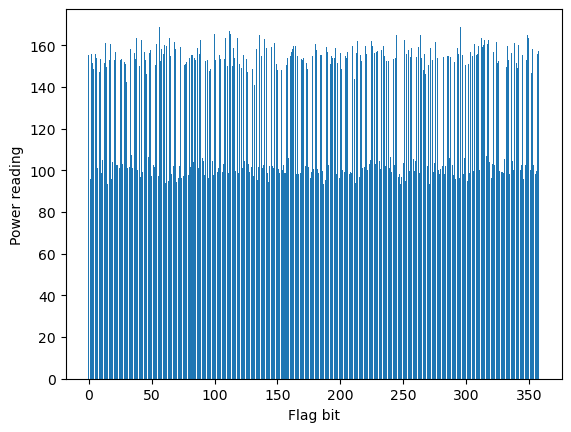

In [18]:
from Crypto.Util.number import long_to_bytes
import json 
import numpy as np
import matplotlib.pyplot as plt

f = open('collected_data.txt', 'r')
readings = np.array(json.loads(f.readline()))

# Means across 50 observations
readings = np.mean(readings, axis=0)
index = list(range(len(readings)))

# Generate the graph
plt.bar(index, readings)
plt.xlabel("Flag bit")
plt.ylabel("Power reading")
plt.savefig('readings.png')

# Retrieve the output from the readings
output = ""
for reading in readings:
    if reading < 120:
        output += "0"
    else:
        output += "1"

# Has to reverse the output string
# 2 ways to implement double-and-add, either LSB to MSB, or MSB to LSB
flag = int(output[::-1], 2)
print(long_to_bytes(flag))